<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week5/%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F5_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_(correct).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VPkoWfiIvZl4HGp49BUaVEEblVIGYh91' -O heart.csv

--2022-07-27 13:12:05--  https://docs.google.com/uc?export=download&id=1VPkoWfiIvZl4HGp49BUaVEEblVIGYh91
Resolving docs.google.com (docs.google.com)... 74.125.23.113, 74.125.23.138, 74.125.23.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/glcm08iu7toarrnh4dbppr0nvff3l1hu/1658927475000/07828702499945486090/*/1VPkoWfiIvZl4HGp49BUaVEEblVIGYh91?e=download&uuid=8b77d2c8-1d30-4a9c-8fcd-032fe195fb0f [following]
--2022-07-27 13:12:06--  https://doc-0k-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/glcm08iu7toarrnh4dbppr0nvff3l1hu/1658927475000/07828702499945486090/*/1VPkoWfiIvZl4HGp49BUaVEEblVIGYh91?e=download&uuid=8b77d2c8-1d30-4a9c-8fcd-032fe195fb0f
Resolving doc-0k-5k-docs.googleusercontent.com (doc-0k-5k-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008

In [2]:
# устанавливаем нужную версию библиотеки sklearn, чтобы ответы сошлись
!pip install scikit-learn==0.22.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 4.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.1 which is incompatible.


In [3]:
import numpy as np
import pandas as pd

В этом задании вы будете работать с [данными о пациентах, у части которых есть заболевание сердца](https://www.kaggle.com/ronitf/heart-disease-uci). Вам нужно построить модель, классифицирующую пациентов на больных этим заболеванием и тех, у кого его нет, а также проанализировать результаты.

In [19]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. Какой процент пациентов из представленных в данных имеет заболевание сердца (`'target' = 1`)? Ответ округлите до двух знаков после запятой.

In [21]:
(data['target'] == 1).mean()*100

54.45544554455446

In [18]:
len(data.loc[data['target'] == 1]) / len(data)

0.5445544554455446

Разделим данную выборку на обучающую и тестовую части в отношении 3:1.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.25, random_state=13)
X_train.shape, X_test.shape

((227, 13), (76, 13))

2. Обучите линейный классификатор из `sklearn` (`sklearn.linear_model.SGDClassifier`) с максимальным числом итераций `max_iter=1000`, постоянным значением шага градиентного спуска (`learning_rate='constant'`), равным `eta0=0.1`. В качестве сида поставьте `random_state=13`. Параметр регуляризации отключите: `alpha=0`. Класс `sklearn.linear_model.SGDClassifier` объединяет в себе разные линейные модели - чтобы получить логистическую регрессию, зафиксируйте параметр `loss='log'`.

   Подробнее о параметрах можно почитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

   Какое значение свободного коэффициента у полученного линейного классификатора? Ответ округлите до двух знаков после запятой.

In [23]:
from sklearn.linear_model import SGDClassifier
classificator = SGDClassifier(max_iter=1000, learning_rate='constant', eta0=0.1, random_state=13, alpha=0, loss='log')
classificator.fit(X_train, y_train)

SGDClassifier(alpha=0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=13, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [8]:
classificator.intercept_

array([-1.15927929])

3. Какое значение L2-нормы вектора весов (без учета свободного коэффициента) у полученного линейного классификатора? Ответ округлите до двух знаков после запятой.

_Напоминание. L2-норма вектора $v = (v_1, \ldots, v_n)$ - это корень из суммы квадратов его элементов:_

$$
\|v\|_2 = \sqrt{\sum\limits_{i=1}^nv_i^2}
$$

In [35]:
classificator.coef_

array([[-93.18252315, -18.25927929,  33.13144142, -65.99603819,
          1.75342142,   2.24072071,   6.44072071, 112.79675487,
        -16.1       , -33.35463964,  11.73144141, -38.3       ,
        -25.37783787]])

In [25]:
np.sqrt(np.sum((classificator.coef_)**2))

175.67735435821564

4. Найдите долю правильных ответов классификатора на тестовой части выборки **(в процентах)**. Ответ округлите до двух знаков после запятой. Например, если значение доли правильных ответов будет равно 0.1234, то ответом будет 12.34 - ведь это 12.34%.

In [27]:
classificator.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, classificator.predict(X_test))*100

61.8421052631579

5. В задаче классификации, как и в задаче регрессии, для оптимизации линейных моделей можно применять регуляризацию. Этот метод реализован и в `sklearn.linear_model.SGDClassifier` - параметр регуляризации обозначается параметром `alpha`. За тип регуляризации (L1, L2 или обе сразу) отвечает параметр `penalty`. 

   Обучите классификатор заново с параметром регуляризации `alpha=0.1` и типом регуляризации `penalty='l1'`. Оставьте максимальное число итераций, равное `max_iter=1000` и сид `random_state=13`. Также вместо постоянного значения шага градиентного спуска используйте оптимальное (`learning_rate='optimal'`), которое, кстати, зависит от `alpha` (о том, как именно он вычисляется и какие еще параметры можно выбрать, можно подробнее прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)). В данном случае значение начального шага градиентного спуска `eta0` никак не участвует в обучении.
   
   Отличается ли качество полученного классификатора от качества первого? Какая доля правильных ответов получается теперь на тестовой выборке? Выразите ее **в процентах**, ответ округлите до двух знаков после запятой. Например, если значение доли правильных ответов будет равно 0.1234, то ответом будет 12.34 - ведь это 12.34%.

In [32]:
classificator_reg = SGDClassifier(alpha=0.1, max_iter=1000, learning_rate='optimal', random_state=13, penalty='l1', loss='log')
classificator_reg.fit(X_train, y_train)
classificator_reg.predict(X_test)
accuracy_score(y_test, classificator_reg.predict(X_test))*100

76.31578947368422

6. Найдите L2-норму вектора весов для полученного классификатора (заметьте, как на нее повлияла регуляризация). Ответ округлите до двух знаков после запятой.

    Заметьте, что вектор стал более разреженным, и в нем появились нулевые элементы - это результат действия L1-регуляризации.

In [36]:
classificator_reg.coef_

array([[-0.87424016,  0.        ,  9.26085004, -0.45773776, -0.01501012,
         0.        ,  0.        ,  0.74467772,  0.        , -0.25903021,
         0.        , -4.1192229 , -2.1071261 ]])

In [34]:
np.sqrt(np.sum((classificator_reg.coef_)**2))

10.429142228977847

7. Наконец, проверьте, как полученные классификаторы предсказывают не классы, а вероятности классов - так как мы работаем с логистической регрессией, это можно сделать. Посмотрите на вероятности, которые выдает первый классификатор (обученный с постоянным шагом градиентного спуска и без регуляризации) на тестовой части выборки. В этом вам поможет метод `predict_proba`. Результатом его работы будет список размера $N\times 2$, где $N$ - это число объектов. В каждом столбце списка находятся вероятности соответствующего класса для объектов. Поэтому если вам нужен положительный класс, вас интересует последний столбец.

    Какое получается значение AUC-ROC? Ответ округлите до двух знаков после запятой.

In [42]:
classificator.predict_proba(X_test)[:, 1]

array([0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.30051711e-240,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1

In [45]:
from sklearn import metrics
y_true = y_test
y_scores = classificator.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores, pos_label=1)
# print(fpr)
# print(tpr)
# print(thresholds)
metrics.auc(fpr, tpr)

0.5697674418604651

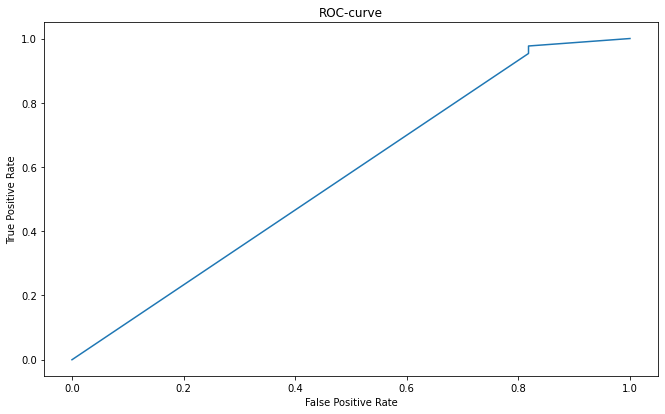

In [44]:
import matplotlib.pyplot as plt

y_proba = classificator.predict_proba(X_test)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

8. Посмотрите на вероятности, которые выдает второй классификатор (обученный с оптимальным шагом градиентного спуска и с регуляризацией) на тестовой части выборки. Что вы наблюдаете - как отличаются эти вероятности от вероятностей первого классификатора?

   Посчитайте значение AUC-ROC второго классификатора. Ответ округлите до двух знаков после запятой.

In [46]:
from sklearn import metrics
y_true = y_test
y_scores = classificator_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores, pos_label=1)
# print(fpr)
# print(tpr)
# print(thresholds)
metrics.auc(fpr, tpr)

0.8558844256518675

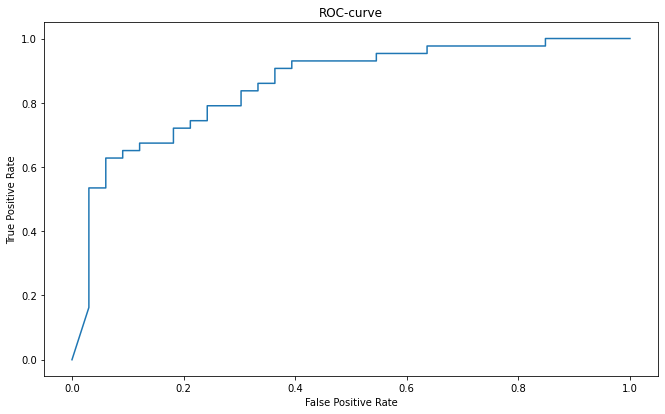

In [48]:
import matplotlib.pyplot as plt

y_proba_reg = classificator_reg.predict_proba(X_test)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_reg[:, 1])
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

9. Какой признак является самым важным по мнению лучшей модели (имеет наибольший по модулю коэффициент) для принятия решения?

In [55]:
# classificator_reg.feature_names_in_

In [54]:
classificator_reg.coef_

array([[-0.87424016,  0.        ,  9.26085004, -0.45773776, -0.01501012,
         0.        ,  0.        ,  0.74467772,  0.        , -0.25903021,
         0.        , -4.1192229 , -2.1071261 ]])

In [58]:
# np.min(classificator_reg.coef_)

In [56]:
np.max(np.abs(classificator_reg.coef_))

9.260850035658027

In [61]:
data.columns[np.argmax(classificator_reg.coef_)]

'cp'